In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
import sys
import h5py
import math
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer , LabelEncoder , StandardScaler
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error, matthews_corrcoef)

In [ ]:
# initializing all the model objects with default parameters
#Classifier

import xgboost as xgb
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [ ]:
from tensorflow.keras.preprocessing import sequence
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution1D,MaxPooling1D
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding
from tensorflow.keras.layers import LSTM, SimpleRNN, GRU ,Bidirectional, BatchNormalization ,Flatten, ConvLSTM1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from tensorflow.compat.v1.keras.layers import CuDNNLSTM, CuDNNGRU

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_to_module = '/content/drive/MyDrive/Advanced-Feature-Selection-Toolbox-main/'
sys.path.append(path_to_module)

In [ ]:
from AFS.issa import jfs

In [ ]:
df=pd.read_csv(r'/content/drive/MyDrive/darknet/Darknet.csv')

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141530 entries, 0 to 141529
Data columns (total 85 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     141530 non-null  object 
 1   Src IP                      141530 non-null  object 
 2   Src Port                    141530 non-null  int64  
 3   Dst IP                      141530 non-null  object 
 4   Dst Port                    141530 non-null  int64  
 5   Protocol                    141530 non-null  int64  
 6   Timestamp                   141530 non-null  object 
 7   Flow Duration               141530 non-null  int64  
 8   Total Fwd Packet            141530 non-null  int64  
 9   Total Bwd packets           141530 non-null  int64  
 10  Total Length of Fwd Packet  141530 non-null  int64  
 11  Total Length of Bwd Packet  141530 non-null  int64  
 12  Fwd Packet Length Max       141530 non-null  int64  
 13  Fwd Packet Len

In [ ]:
df['Label'].value_counts()


Non-Tor    93356
NonVPN     23863
VPN        22919
Tor         1392
Name: Label, dtype: int64

In [ ]:
df.replace([np.inf, - np.inf], np.nan, inplace = True)

In [ ]:
df=df.dropna()

In [ ]:
dff=df.drop(['Flow ID','Src IP','Dst IP','Timestamp','Label.1'],axis=1)

In [ ]:
dff

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,57158,443,6,229,1,1,0,0,0,0,...,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
1,57159,443,6,407,1,1,0,0,0,0,...,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
2,57160,443,6,431,1,1,0,0,0,0,...,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
3,49134,443,6,359,1,1,0,0,0,0,...,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
4,34697,19305,6,10778451,591,400,64530,6659,131,0,...,20,0,0,0,0,1.437760e+15,3.117718e+06,1.437760e+15,1.437760e+15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,55219,5355,17,411806,2,0,44,0,22,22,...,8,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3
141526,64207,5355,17,411574,2,0,44,0,22,22,...,8,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3
141527,61115,5355,17,422299,2,0,44,0,22,22,...,8,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3
141528,64790,5355,17,411855,2,0,44,0,22,22,...,8,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3


In [ ]:
label=LabelEncoder()
dff['Label']=label.fit_transform(dff['Label'])

In [ ]:
traindata, testdata = train_test_split(dff,test_size=0.20,random_state=42)

In [ ]:
X = traindata.iloc[:,0:79]
Y = traindata['Label']
C = testdata['Label']
T = testdata.iloc[:,0:79]

In [ ]:
xtrain=X.values
ytrain=Y.values
xtest=T.values
ytest=C.values

In [ ]:
feat = dff.iloc[:,0:79]
label = dff['Label.1']

In [ ]:
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}

In [ ]:
# parameter
k    = 5     # k-value in KNN
N    = 10    # number of salps
T    = 20   # maximum number of iterations
opts = {'k':k, 'fold':fold, 'N':N, 'T':T}

In [ ]:
# perform feature selection
fmdl = jfs(feat, label, opts)
sf   = fmdl['sf']

Iteration: 1
Best (ISSA): 0.1533125084154826
Iteration: 2
Best (ISSA): 0.15319928802221291
Iteration: 3
Best (ISSA): 0.15319928802221291
Iteration: 4
Best (ISSA): 0.15300589631767558
Iteration: 5
Best (ISSA): 0.15196457736048413
Iteration: 6
Best (ISSA): 0.1509767059441377
Iteration: 7
Best (ISSA): 0.15092009574750284
Iteration: 8
Best (ISSA): 0.1507318036576763
Iteration: 9
Best (ISSA): 0.1507318036576763
Iteration: 10
Best (ISSA): 0.15010715453577175
Iteration: 11
Best (ISSA): 0.1497006839299062
Iteration: 12
Best (ISSA): 0.1497006839299062
Iteration: 13
Best (ISSA): 0.1497006839299062
Iteration: 14
Best (ISSA): 0.14529754238831066
Iteration: 15
Best (ISSA): 0.14529754238831066
Iteration: 16
Best (ISSA): 0.14529754238831066
Iteration: 17
Best (ISSA): 0.14529754238831066
Iteration: 18
Best (ISSA): 0.14529754238831066
Iteration: 19
Best (ISSA): 0.14529754238831066
Iteration: 20
Best (ISSA): 0.14529754238831066


In [ ]:
# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)

Feature Size: 34


In [ ]:
sf

array([ 0,  1,  3,  5,  6,  7,  9, 15, 19, 22, 23, 24, 30, 32, 33, 35, 37,
       42, 44, 46, 47, 51, 52, 54, 55, 58, 61, 64, 67, 69, 71, 75, 76, 78])

In [ ]:
fmdl

{'sf': array([ 0,  1,  3,  5,  6,  7,  9, 15, 19, 22, 23, 24, 30, 32, 33, 35, 37,
        42, 44, 46, 47, 51, 52, 54, 55, 58, 61, 64, 67, 69, 71, 75, 76, 78]),
 'c': array([[0.15331251, 0.15319929, 0.15319929, 0.1530059 , 0.15196458,
         0.15097671, 0.1509201 , 0.1507318 , 0.1507318 , 0.15010715,
         0.14970068, 0.14970068, 0.14970068, 0.14529754, 0.14529754,
         0.14529754, 0.14529754, 0.14529754, 0.14529754, 0.14529754]]),
 'nf': 34}

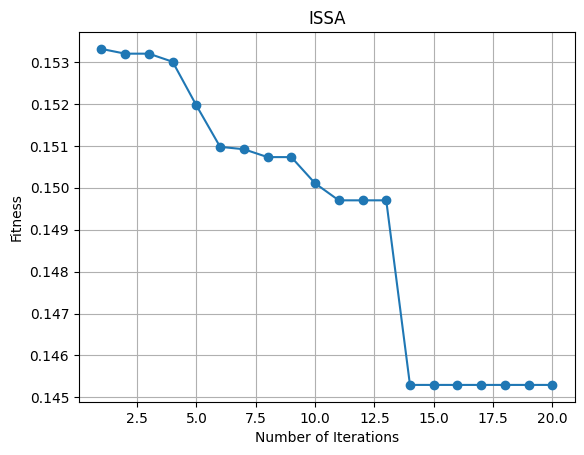

In [ ]:
# plot convergence
curve   = fmdl['c']
curve   = curve.reshape(np.size(curve,1))
x       = np.arange(0, opts['T'], 1.0) + 1.0

fig, ax = plt.subplots()
ax.plot(x, curve, 'o-')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Fitness')
ax.set_title('ISSA')
ax.grid()
plt.show()

In [ ]:
data=dff.iloc[:,[0,  1,  3,  5,  6,  7,  9, 15, 19, 22, 23, 24, 30, 32, 33, 35, 37, 42, 44, 46, 47, 51, 52, 54, 55, 58, 61, 64, 67, 69, 71, 75, 76, 78, 79]]

In [ ]:
data

,Src Port,Dst Port,Flow Duration,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Min,Bwd Packet Length Std,Flow IAT Std,Fwd IAT Total,...,Fwd Packet/Bulk Avg,Bwd Packet/Bulk Avg,Subflow Fwd Bytes,FWD Init Win Bytes,Fwd Act Data Pkts,Active Mean,Idle Mean,Idle Std,Idle Min,Label
0,57158,443,229,1,0,0,0,0.000000,0.000000,0,...,0,0,0,1892,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0
1,57159,443,407,1,0,0,0,0.000000,0.000000,0,...,0,0,0,1987,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0
2,57160,443,431,1,0,0,0,0.000000,0.000000,0,...,0,0,0,2049,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0
3,49134,443,359,1,0,0,0,0.000000,0.000000,0,...,0,0,0,2008,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0
4,34697,19305,10778451,400,64530,6659,0,46.833714,11412.466410,10778451,...,0,659,65,1382,581,0,1.437760e+15,3.117718e+06,1.437760e+15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,55219,5355,411806,0,44,0,22,0.000000,0.000000,411806,...,0,0,22,0,1,0,0.000000e+00,0.000000e+00,0.000000e+00,3
141526,64207,5355,411574,0,44,0,22,0.000000,0.000000,411574,...,0,0,22,0,1,0,0.000000e+00,0.000000e+00,0.000000e+00,3
141527,61115,5355,422299,0,44,0,22,0.000000,0.000000,422299,...,0,0,22,0,1,0,0.000000e+00,0.000000e+00,0.000000e+00,3
141528,64790,5355,411855,0,44,0,22,0.000000,0.000000,411855,...,0,0,22,0,1,0,0.000000e+00,0.000000e+00,0.000000e+00,3


In [ ]:
traindata, testdata = train_test_split(data,test_size=0.20,random_state=42)

In [ ]:
Y.value_counts()

0    74654
1    19109
3    18311
2     1110
Name: Label, dtype: int64

In [ ]:
X = traindata.iloc[:,0:34]
Y = traindata['Label']
C = testdata['Label']
T = testdata.iloc[:,0:34]

In [ ]:
scaler = StandardScaler().fit(X)
trainX = scaler.transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
#print(trainX[0:5,:])

scaler = StandardScaler().fit(T)
testT = scaler.transform(T)
# summarize transformed data
np.set_printoptions(precision=3)
#print(testT[0:5,:])


y_train = np.array(Y)
y_test = np.array(C)

In [ ]:

# initializing all the model objects with default parameters
#Classifier

et=ExtraTreesClassifier()
xg=xgb.XGBClassifier()
rf=RandomForestClassifier()
dt=DecisionTreeClassifier()
svc=SVC()
knn=KNeighborsClassifier()
ada=AdaBoostClassifier()
nb=GaussianNB()

In [ ]:
#check each classifier accuracy here
def clf_perform(cn):
  clf=cn
  clf.fit(trainX,y_train)
  y_pred=clf.predict(testT)
  acc=accuracy_score(y_test,y_pred)
  prc=precision_score(y_test,y_pred, average="weighted")
  rc=recall_score(y_test,y_pred, average="weighted")
  f1=f1_score(y_test,y_pred, average="weighted")
  print(acc,prc,rc,f1)

In [ ]:
clf_perform(xg)

0.8017811075379015 0.8077856399710613 0.8017811075379015 0.7852260324223754


In [ ]:
clf_perform(et)

0.8247164010319115 0.8215856831254884 0.8247164010319115 0.812030536904298


In [ ]:
clf_perform(rf)

0.7998374385977312 0.8407383038910536 0.7998374385977312 0.7798801914506898


In [ ]:
clf_perform(dt)

0.5134819945577269 0.7011395065501547 0.5134819945577269 0.5721316288036511


In [ ]:
clf_perform(ada)

0.5493161819274128 0.8147549527380209 0.5493161819274128 0.6201748675771603


In [ ]:
clf_perform(nb)

0.4400466480545641 0.609962711260139 0.4400466480545641 0.4545714731729643


In [ ]:
clf_perform(knn)

0.9249037000388733 0.9241509534316446 0.9249037000388733 0.9244393728625491


In [ ]:
clf_perform(svc)

0.8894229070219458 0.8882785247473758 0.8894229070219458 0.8845137852520922


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 23.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier(iterations=20,learning_rate=0.5)
clf=cat
clf.fit(trainX,y_train)
y_pred=clf.predict(testT)
acc=accuracy_score(y_test,y_pred)
prc=precision_score(y_test,y_pred, average="weighted")
rc=recall_score(y_test,y_pred, average="weighted")
f1=f1_score(y_test,y_pred, average="weighted")
print(acc,prc,rc,f1)


0:	learn: 0.5539625	total: 27.9ms	remaining: 531ms
1:	learn: 0.3823360	total: 53.4ms	remaining: 480ms
2:	learn: 0.2981102	total: 76.7ms	remaining: 435ms
3:	learn: 0.2411413	total: 101ms	remaining: 404ms
4:	learn: 0.2081964	total: 123ms	remaining: 368ms
5:	learn: 0.1981228	total: 141ms	remaining: 329ms
6:	learn: 0.1840168	total: 161ms	remaining: 299ms
7:	learn: 0.1632383	total: 185ms	remaining: 278ms
8:	learn: 0.1515549	total: 209ms	remaining: 255ms
9:	learn: 0.1396556	total: 236ms	remaining: 236ms
10:	learn: 0.1360214	total: 258ms	remaining: 211ms
11:	learn: 0.1332179	total: 276ms	remaining: 184ms
12:	learn: 0.1280252	total: 298ms	remaining: 161ms
13:	learn: 0.1224992	total: 325ms	remaining: 139ms
14:	learn: 0.1163838	total: 346ms	remaining: 115ms
15:	learn: 0.1130471	total: 371ms	remaining: 92.9ms
16:	learn: 0.1104075	total: 395ms	remaining: 69.6ms
17:	learn: 0.1063013	total: 420ms	remaining: 46.6ms
18:	learn: 0.1047315	total: 441ms	remaining: 23.2ms
19:	learn: 0.1011563	total: 467ms	

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lightgbm import LGBMClassifier
lgb=LGBMClassifier()

In [ ]:
clf_perform(lgb)

0.7944305050005301 0.8309461301373374 0.7944305050005301 0.772533782387806


In [ ]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(trainX, (trainX.shape[0], trainX.shape[1],1))
X_test = np.reshape(testT, (testT.shape[0], testT.shape[1],1))


print(X_train.shape)


batch_size = 32

(113184, 34, 1)


In [ ]:
data['Label'].value_counts()

0    93309
1    23861
3    22919
2     1392
Name: Label, dtype: int64

In [ ]:
model1 = Sequential()
model1.add(Convolution1D(20, 5, padding="same",activation="tanh",input_shape=(34, 1)))
model1.add(MaxPooling1D(pool_size=(2)))
model1.add(Convolution1D(40, 5, padding="same", activation="tanh"))
model1.add(MaxPooling1D(pool_size=(2)))
model1.add(Convolution1D(60, 5, padding="same",activation="tanh"))
model1.add(MaxPooling1D(pool_size=(1)))
model1.add(Bidirectional(CuDNNLSTM(64, return_sequences=True)))
model1.add(Dropout(0.2))
model1.add(CuDNNLSTM(64, return_sequences=True))
model1.add(Dropout(0.2))
model1.add(Bidirectional(CuDNNGRU(64)))
model1.add(Dropout(0.2))
model1.add(Dense(4, activation="softmax"))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 34, 20)            120       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 17, 20)           0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 17, 40)            4040      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 8, 40)            0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 8, 60)             12060     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 8, 60)           

In [ ]:
# try using different optimizers and different optimizer configs
model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.hdf5", verbose=1, save_best_only=True, monitor='val_accuracy',mode='max')
csv_logger = CSVLogger('training_set_iranalysis.csv',separator=',', append=False)
m1=model1.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test),callbacks=[checkpointer,csv_logger])

Epoch 1/50
1769/1769 [==============================] - ETA: 0s - loss: 0.3885 - accuracy: 0.8565
Epoch 1: val_accuracy improved from -inf to 0.88398, saving model to model.hdf5
1769/1769 [==============================] - 35s 11ms/step - loss: 0.3885 - accuracy: 0.8565 - val_loss: 0.3125 - val_accuracy: 0.8840
Epoch 2/50
1764/1769 [============================>.] - ETA: 0s - loss: 0.2634 - accuracy: 0.9006
Epoch 2: val_accuracy improved from 0.88398 to 0.90472, saving model to model.hdf5
1769/1769 [==============================] - 18s 10ms/step - loss: 0.2633 - accuracy: 0.9006 - val_loss: 0.2429 - val_accuracy: 0.9047
Epoch 3/50
1765/1769 [============================>.] - ETA: 0s - loss: 0.2427 - accuracy: 0.9080
Epoch 3: val_accuracy improved from 0.90472 to 0.90854, saving model to model.hdf5
1769/1769 [==============================] - 18s 10ms/step - loss: 0.2427 - accuracy: 0.9080 - val_loss: 0.2362 - val_accuracy: 0.9085
Epoch 4/50
1768/1769 [============================>.] -

In [ ]:
model1.load_weights('model.hdf5')

In [ ]:
loss, accuracy = model1.evaluate(X_test, y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

885/885 [==============================] - 3s 4ms/step - loss: 0.1633 - accuracy: 0.9375

Loss: 0.16, Accuracy: 93.75%


In [ ]:
y_pred=model1.predict(X_test)
classes_x=np.argmax(y_pred,axis=1)

885/885 [==============================] - 3s 3ms/step


In [ ]:
recall = recall_score(y_test, classes_x, average="weighted")
precision = precision_score(y_test, classes_x , average="weighted")
f1 = f1_score(y_test, classes_x, average="weighted")
print(accuracy,recall,precision,f1)

0.9374845623970032 0.9374845389970669 0.9377281442944267 0.9372602645561039


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,classes_x))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18655
           1       0.86      0.80      0.83      4752
           2       0.91      0.83      0.87       282
           3       0.81      0.86      0.83      4608

    accuracy                           0.94     28297
   macro avg       0.89      0.87      0.88     28297
weighted avg       0.94      0.94      0.94     28297



In [ ]:
# plot convergence
curve   = arr
curve   = curve.reshape(np.size(curve,1))
x       = np.arange(0, 10, 1.0) + 1.0

#fig, ax = plt.subplots()
plt.plot(x, curve, 'o-')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness')
plt.title('Salp')
plt.grid()
plt.savefig("salp.png", format="png", dpi=1200)
plt.show()

NameError: ignored